In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

In [19]:
Amtrak_df

,Ridership,log_rider
Month,,
1991-01-01,1709,3.232742
1991-02-01,1621,3.209783
1991-03-01,1973,3.295127
1991-04-01,1812,3.258158
1991-05-01,1975,3.295567
...,...,...
2000-08-01,2097,3.321598
2000-09-01,1824,3.261025
2000-10-01,1977,3.296007


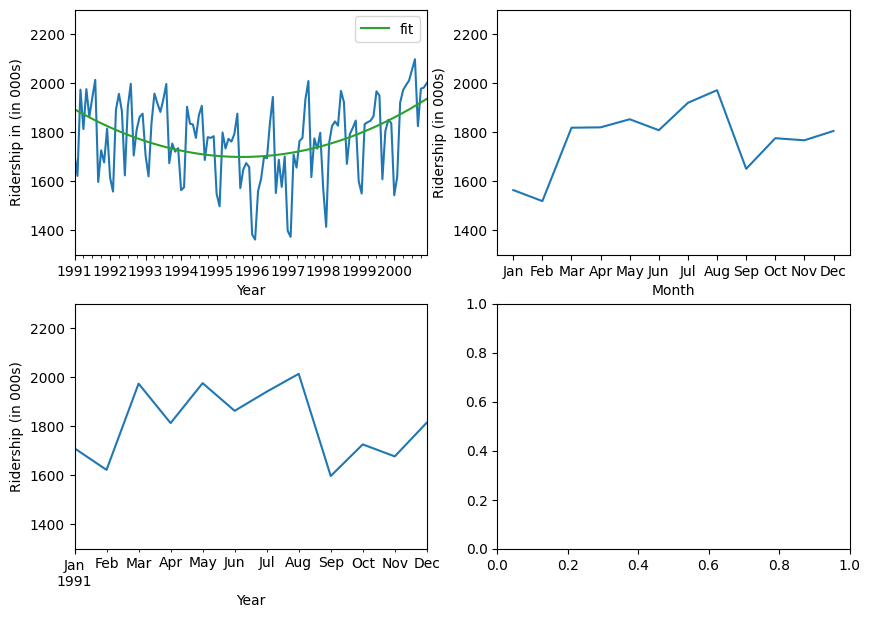

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))

Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%b-%y')
Amtrak_df.set_index('Month', inplace=True)

# fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)),
                                    Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_df.index

ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year'); ax.set_ylabel('Ridership in (in 000s)') # set x and y-axis label

# Zoomn in 2 -year period 1/1/1991 to 12/1/1992
ridership_2yrs = Amtrak_df.loc['Jan-91' : 'Dec-91']
ax = ridership_2yrs.plot(ylim=[1300,2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') # set x and y-axis label

# Average by month
byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month'); ax.set_ylabel('Ridership (in 000s)') # set xand y-axis label
yticks = [-2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1,13)]);